# Burn Severity  with Sentinel-2 data using Google Earth Engine
In this Jupyter Notebook, we first visualize true color images of the August Complex fire before and after it burned. Bands from the Sentinel 2 satellites as well as a dataset from USGS with wildfire boundaries are used for our analysis. Then, the Normalized Burn Ratio (NBR) is used to analyze burn severity, which is a measure of the degree to which a fire has affected the ecosystem. To compare these two images, we will compute the normalized difference to show where burn severity most significantly affected the vegetation and soil. We then added a scale to the normalized difference to show the levels of burn severity from the August Complex fire. Finally, we visualized the levels of severity to show the overall intensity. This link provides more information on the Sentinel 2 dataset that was used: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2.


### Authors
- Guillermo Romero, Bren School of Environmental Science & Management, UCSB (romero61@ucsb.edu)
- Wade Sedgewick, Bren School of Environmental Science & Management, UCSB (wsedgwick@ucsb.edu)
- Hailey Veirs, Bren School of Environmental Science & Management, UCSB (hveirs@ucsb.edu)

### Table of Contents

1. [Purpose](#Purpose)
2. [Dataset Description](#Dataset_Description)
3. [Data I/O](#Data_I/O)
4. [Metadata Display](#Metadata_Display)
5. [True Color Visualization](#True_Color_Visualization)
6. [Use Case Examples](#Use_Case_Examples)
7. [Use Case Discussion](#Use_Case_Discussion)
8. [References](#References)

<a id='Purpose'></a>
# Notebook Purpose
Wildfires in California are becoming increasingly straining on the environment as well as the millions of people living in the state. As the world struggles to deal with climate change and droughts in the West, California must be proactive at addressing this threat. This notebook aims at visualizing the severity of the August Complex fire, the largest wildfire by area in California’s history. This fire began on August 16th and wasn’t contained until November 12th. California’s 7 biggest wildfires have all occurred in the past 5 years as California becomes a more draught-prone state, which means that this problem will only get worse. The wildfire started from multiple lightning strikes that resulted in 13 separate fires, and over the following week, they quickly joined to form the August Fire, which lasted just under three months.

To visualize the severity of the August Complex fire, we will do an analysis of the difference Normalized Burn Ratio (dNBR). Sentinel 2, the satellites used for Europe’s Earth observation program, will be used to conduct this analysis. The NDBR is an analysis on quantifying the damage that the fire had on the ecosystem. The NBR before and after the fires is first calculated. We use these images to calculate the NDBR, which shows the difference in burn severity. With Sentinel’s Visible and Near Infrared (VNIR) and Shortwave Infrared (SWIR) bands at 20 meter resolution, we are able to visualize the severity of the largest wildlife in California. Lastly, we display the proportion of level of severity, showing how detrimental it was to the environment.

<a id='Dataset_Description'></a>
# Dataset Description
**Sentinel 2**

The dataset we will be using is the Sentinel 2 which was collected and distributed by Copernicus, Europe’s Earth observation program. Sentinel 2 uses two separate satellites for increased temporal resolution. These satellites focus on terrestrial monitoring, whereas Sentinel 1 aims at capturing imagery of both marine and terrestrial areas. The Sentinel 2 satellites focus on monitoring coasts, vegetation and soil.

**Resolution & File Format**

The Sentinel 2 satellites collect 13 separate bands. Sentinel 2A was launched June, 2015 and Sentinel 2B was launched March, 2017. Because the Sentinel 2 program comprises of two satellites that rotate the earth every 10 days, an entire cycle is completed in only five days. This increased temporal resolution is more than three times higher than Landsat 8. This is due to the focus on land and near-shore monitoring. The Sentinel satellites collect 13 separate bands: the visible bands have a resolution of 10 meters, five 20 meter and one 10 meter Visible and Near Infrared bands, two 60 meter and two 20-meter Shortwave Infrared bands, and one 60 meter Ultra Blue band (for coastal sediment and aerosols). We will be using a 20-meter NIR band as well as a 20-meter SWIR band for our NDBR analysis. 

**File Format & Data Retrieval**

The data format for Sentinel 2 are ImageCollections, which are a collection of all images as individual bands taken by Sentinel 2A and 2B over their lifetimes. For our analysis, we used Google Earth Engine.

**Limitations** 

The Sentinel 2 satellites have been in orbit for five and seven years, providing highly temporal and decently spatial resolution. However, there are some limitations in using the data. The most prominent is cloud coverage, which affects how much of the earth a satellite can record. Although trends can show where cloud coverage might be more difficult to work around, the randomness and frequency of clouds interfering with imagery collection can mean that researchers do not have access to satellite imagery at a certain date. Additionally, although 10 meters is an improvement to the 30-meter Landsat visible bands, this is still not at a resolution for spatially detailed analysis such as individual tree identification. 

**MTBS Polygon Data**

We will also use the US Forest Service's Monitoring Trends in Burned Severity (MTBS) shapefiles with the Sentinel data. The data is made of shapefiles with several other saved variables such as the acerage of burned area, latitude longitude, ignition date, and dNBR values over certain thresholds. These shapefiles are delineated from Landsat imagery and burn severity index data at a map scale of 1:24,000 to 1:50,000. Additionally, all vector data is in Albers Equal Area projection. 

For this notebook, we will be using the polygon geometry to help subset our Sentinel data to the burned area. Although the MTBS vector data includes high to low burn severity threshold data, it only includes the value that each threshold was determined as, not the area values that correspond to each threshold. Luckily, we can still use the vector data in our case example. 

<a id='Data_I/O'></a>
# Data Input/Output

First, import the packages we need.

In [1]:
#1) Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import ee
import geemap

In [2]:
#ee.Authenticate()
ee.Initialize()

In [3]:
# Loading Sentinel-2 MSI: MultiSpectral Instrument, Level-1C
imagery = ee.ImageCollection('COPERNICUS/S2')
#Loading Monitoring Trends in Burn Severity (MTBS) Feature Collection Dataset
MTBS = ee.FeatureCollection("USFS/GTAC/MTBS/burned_area_boundaries/v1")

In [4]:
Map = geemap.Map(center=[39.9, -109], zoom=6.49)
Map

Map(center=[39.9, -109], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=…

In [5]:
Map.addLayer(MTBS, {}, 'Boundaries')

<a id='Metadata_Display'></a>
# Metadata Display

In [6]:
# Show the metadata of the Sentinel raster data.
testimg = imagery.first()
testimg.getInfo()

{'type': 'Image',
 'bands': [{'id': 'B1',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [1830, 1830],
   'crs': 'EPSG:32631',
   'crs_transform': [60, 0, 300000, 0, -60, 3100020]},
  {'id': 'B2',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [10980, 10980],
   'crs': 'EPSG:32631',
   'crs_transform': [10, 0, 300000, 0, -10, 3100020]},
  {'id': 'B3',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [10980, 10980],
   'crs': 'EPSG:32631',
   'crs_transform': [10, 0, 300000, 0, -10, 3100020]},
  {'id': 'B4',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 65535},
   'dimensions': [10980, 10980],
   'crs': 'EPSG:32631',
   'crs_transform': [10, 0, 300000, 0, -10, 3100020]},
  {'id': 'B5',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min':

In [7]:
# Show the metadata of the MTBS vector data.
shape = MTBS.first()
shape.getInfo()
#MTBS.limit(1).getInfo()

{'type': 'Feature',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-119.38591594185316, 46.608000178959415],
    [-119.3857197620494, 46.60746062836953],
    [-119.3849973934919, 46.605788467058886],
    [-119.38431506435111, 46.605048233122034],
    [-119.38384242842645, 46.604392769257],
    [-119.38369087131915, 46.60380859251704],
    [-119.38399415384015, 46.60285438814439],
    [-119.38399413844814, 46.6021810439697],
    [-119.3839895860506, 46.601057339239944],
    [-119.3832271305769, 46.60008526935568],
    [-119.38271437763693, 46.599153306998126],
    [-119.38205884427447, 46.59848887297507],
    [-119.3805606385806, 46.59678553596452],
    [-119.37976688884524, 46.596228171149846],
    [-119.37893749395022, 46.5956038943552],
    [-119.37879925913909, 46.59549682467806],
    [-119.37835331516303, 46.59508658178018],
    [-119.37749266785251, 46.59449800574961],
    [-119.37556188696519, 46.59307555318247],
    [-119.37477267263473, 46.59251815871897],
    [-119.37393

In [13]:
# Below is an additional way to subset data using a Feature Collection:
# Needs to be seperated into different code blocks to run
#counties = ee.FeatureCollection("TIGER/2018/Counties")
#Map.addLayer(counties, {}, 'US Counties')
##### DRAW POLYGON TO SELECT COUNTIES! ####
#Map.draw_features
#roi = ee.FeatureCollection(Map.draw_features)
#selected_counties = counties.filterBounds(roi)
#Map.addLayer(selected_counties, {}, "Selected Counties")
#Map.centerObject(selected_counties, zoom = 8);
#august_complex = MTBS.filterBounds(roi)
#Map.addLayer(august_complex, {}, "August Complex Boundary")
#Map.centerObject(august_complex, zoom = 8);
#Map.remove_last_drawn()

#Map.remove_ee_layer('US Counties')
#Map.remove_ee_layer('August Complex Boundary')
#c_polygon = selected_counties.geometry().geometries().filter(ee.Filter.hasType('item','Polygon')); 
#geometry = ee.Geometry.MultiPolygon(c_polygon)                     
#geometry = ee.FeatureCollection(geometry)  
#geemap.ee_to_shp(geometry, filename='../downloads/selected_counties.shp')

<a id='True_Color_Visualization'></a>
# True Color Visualization

Start off by making a true color image of our use case example. This will show how the Sentinel data looks, as well as how we filter it to based on the MTBS shapefile.

In [14]:
aug_complex = MTBS.filter(ee.Filter.eq('Incid_Name', 'AUGUST COMPLEX'));

In [15]:
#august_complex.getInfo()
aug_complex.getInfo()
#BurnBndAc	INT	 Burn boundary acreage  1068802

{'type': 'FeatureCollection',
 'columns': {'Asmnt_Type': 'String',
  'BurnBndAc': 'Long',
  'BurnBndLat': 'String',
  'BurnBndLon': 'String',
  'Comment': 'String',
  'Event_ID': 'String',
  'High_T': 'Long',
  'Ig_Date': 'Long',
  'IncGreen_T': 'Long',
  'Incid_Name': 'String',
  'Incid_Type': 'String',
  'Low_T': 'Long',
  'Map_ID': 'Long',
  'Map_Prog': 'String',
  'Mod_T': 'Long',
  'NoData_T': 'Long',
  'Perim_ID': 'String',
  'Post_ID': 'String',
  'Pre_ID': 'String',
  'dNBR_offst': 'Long',
  'dNBR_stdDv': 'Long',
  'irwinID': 'String',
  'system:index': 'String'},
 'version': 1662053186524383,
 'id': 'USFS/GTAC/MTBS/burned_area_boundaries/v1',
 'properties': {'system:asset_size': 183874238},
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-123.51767884718052, 40.26900901543728],
      [-123.51766995463137, 40.26895103059604],
      [-123.51766101958971, 40.268901991145135],
      [-123.51764764960616, 40.268848446214186],
      [-123.5

In [16]:
Map = geemap.Map(center=[39.9, -122.9], zoom=8.7)
Map

Map(center=[39.9, -122.9], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childre…

In [17]:
Map.addLayer(aug_complex, {}, "August Complex Boundary")
#Map.centerObject(selected_counties, zoom = 9);
#Map.remove_ee_layer('Boundaries')


The code below is outlining and saving time frames before the start of the fire and after the end of the fire. We chose to do ~15 day timeframes because the Sentinel satellite images are taken approximately every 5 days. The ~15 day timeframe means that we will hopefully have 2-3 images to use in our analysis.

In [18]:
# Start of fire August 16
# End of fire November 12
prefire_start = '2020-07-15';   
prefire_end = '2020-07-30';


postfire_start = '2020-11-13';
postfire_end = '2020-11-30';
# Load the Sentinel data
imagery = ee.ImageCollection('COPERNICUS/S2')

# Filter the Image collection based on the timeframes. 
# Filter the cells to the MTBS polygon.
prefireImCol = ee.ImageCollection(imagery.filterDate(prefire_start, prefire_end).filterBounds(aug_complex));
postfireImCol = ee.ImageCollection(imagery.filterDate(postfire_start, postfire_end).filterBounds(aug_complex));


In [19]:
# Function to mask clouds from the pixel quality band of Sentinel-2 SR data.
def  maskS2sr(image):
  # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = ee.Number(2).pow(10).int();
    cirrusBitMask = ee.Number(2).pow(11).int();
  #Get the pixel QA band.
    qa = image.select('QA60');
  #All flags should be set to zero, indicating clear conditions.
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).bitwiseAnd(cirrusBitMask).eq(0);
  #Return the masked image, scaled to TOA reflectance, without the QA bands.
    return image.updateMask(mask).copyProperties(image, ["system:time_start"]);


In [20]:
# Apply platform-specific cloud mask
prefire_CM_ImCol = prefireImCol.map(maskS2sr);
postfire_CM_ImCol = postfireImCol.map(maskS2sr);


The code below creates a mosaic of images if our polygon includes the boundaries between images. It creates and saves one continuous image instead of multiple images. 

In [21]:
# If multiple images in area creates mosaic and clips otherwise only clips
# Without CLoud Mask

pre_mos = prefireImCol.mosaic().clip(aug_complex);
post_mos = postfireImCol.mosaic().clip(aug_complex);
# With Cloud Mask
pre_cm_mos = prefire_CM_ImCol.mosaic().clip(aug_complex);
post_cm_mos = postfire_CM_ImCol.mosaic().clip(aug_complex);

Set up parameters for true color images using band 2, 3, and 4 from the Sentinel satellites, and adding non-cloud masked pre-fire and post-fire images and cloud masked pre-fire and post-fire images

In [22]:
#visualization parameters for true color images
vis = {'bands': ['B4', 'B3', 'B2'], 'max': 2000, 'gamma': 1.5};
# Add the true color images to the map.
Map.addLayer(pre_mos, vis,'Pre-fire image');
Map.addLayer(post_mos, vis,'Post-fire image');

In [23]:
#Add the true color images to the map.
Map.addLayer(pre_cm_mos, vis,'Pre-fire True Color Image - Clouds masked');
Map.addLayer(post_cm_mos, vis,'Post-fire True Color Image - Clouds masked');
Map

Map(bottom=49969.0, center=[39.9, -122.9], controls=(WidgetControl(options=['position', 'transparent_bg'], wid…

<a id='usecases'></a> 
# Use Case Example 

For our use case, we wanted to use Sentinel data to understand how severe the August Complex fire was in 2020. We will use the Sentinel data to calculate the NBR and dNBR of the fire. It lasted from August 16th to November 12th, and it burned over a million acres accross multiple national parks - largely in the Mendocino National Forest. 
 

## NBRs in greyscale


The Normalized Burn Ratio (NBR) is the ratio between NIR and SWIR, as shown by the equation below:

 

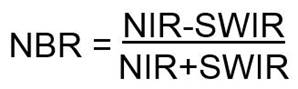


The Normalized Burn Ratio (NBR) is used to highlight burned areas and estimate burn severity, using near-infrared (NIR) and shortwave-infrared (SWIR) wavelengths.  Healthy vegetation has very high NIR reflectance and low SWIR. Recently burned areas have a low NIR reflectance and high SWIR reflectance.

The spectral response curves of healthy vegetation versus burned vegetation is shown below. Since the two reach peak differences in the NIR and SWIR wavelengths, we can calculate the ratio of this difference to focus on where the August Complex fire burned.

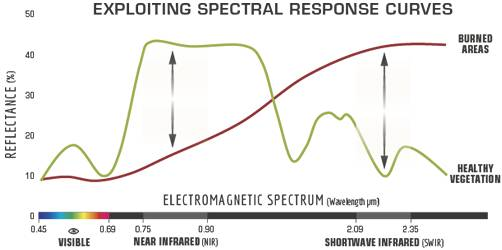


Preparing pre-fire and post-fire Normalized Burn Ratio (NBR) images:

In [25]:
preNBR = pre_cm_mos.normalizedDifference(['B8', 'B12']);
postNBR = post_cm_mos.normalizedDifference(['B8', 'B12']);

## Creating an interactive map of pre-fire and post-fire NBRs

In [26]:
#Burn Ratio Product - Greyscale
grey = ['white', 'black'];
left_layer = geemap.ee_tile_layer(preNBR, {'min': -1, 'max': 1, 'palette': grey}, 'Prefire Normalized Burn Ratio')
right_layer = geemap.ee_tile_layer(postNBR, {'min': -1, 'max': 1, 'palette': grey}, 'Postfire Normalized Burn Ratio')

Maps =  geemap.Map(center=[39.9, -122.9], zoom=8.7)
Maps.split_map(left_layer, right_layer)
Maps

Map(center=[39.9, -122.9], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

## Adding Burn Severity map with levels of severity

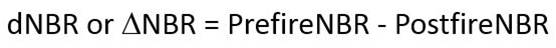

A higher value of dNBR indicates more severe damage, while areas with negative dNBR values may indicate regrowth following a fire.

Table 1. Burn severity levels obtained calculating dNBR, proposed by USGS.
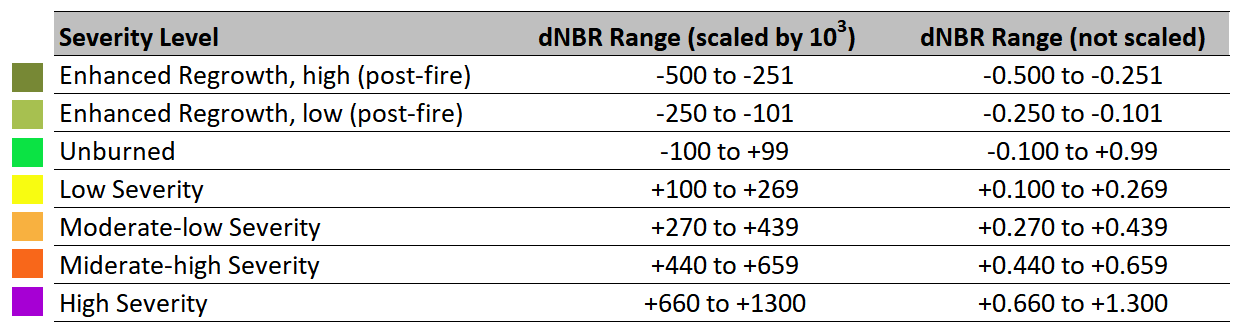

In [27]:
dNBR_unscaled = preNBR.subtract(postNBR);

#Scale product to USGS standards
dNBR = dNBR_unscaled.multiply(1000);

In [28]:
Map2 = geemap.Map(center=[39.9, -122.9], zoom=8.7)
Map2.add_basemap('SATELLITE')
Map2

Map(center=[39.9, -122.9], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childre…

In [29]:
# dNBR greyscale
Map2.addLayer(dNBR, {'min': -1000, 'max': 1000, 'palette': grey}, 'dNBR greyscale');

In [30]:
#Define an SLD style of discrete intervals to apply to the image.
sld_intervals = '<RasterSymbolizer>' + '<ColorMap type="intervals" extended="false" >' + '<ColorMapEntry color="#ffffff" quantity="-500" label="-500"/>' + '<ColorMapEntry color="#7a8737" quantity="-250" label="-250" />' + '<ColorMapEntry color="#acbe4d" quantity="-100" label="-100" />' + '<ColorMapEntry color="#0ae042" quantity="100" label="100" />' + '<ColorMapEntry color="#fff70b" quantity="270" label="270" />' + '<ColorMapEntry color="#ffaf38" quantity="440" label="440" />' + '<ColorMapEntry color="#ff641b" quantity="660" label="660" />' + '<ColorMapEntry color="#a41fd6" quantity="2000" label="2000" />' + '</ColorMap>' + '</RasterSymbolizer>';

In [31]:
Map2.addLayer(dNBR.sldStyle(sld_intervals), {}, 'dNBR classified');
#==========================================================================================
#                                   ADD A LEGEND

legend_dict = {
    "Enhanced Regrowth, High": '7a8737',
    'Enhanced Regrowth, Low':  'acbe4d',
    'Unburned': '0ae042',
    'Low Severity': 'fff70b',
    'Moderate-low Severity': 'ffaf38',
    'Moderate-high Severity': 'ff641b',
    'High Severity': 'a41fd6',
    'NA': 'ffffff'}


Map2.add_legend(legend_title = "dNBR Classes", legend_dict = legend_dict)

In [32]:
 ## Derive extent of burn severity classes

In [33]:
thresholds = ee.Image([-1000, -251, -101, 99, 269, 439, 659, 2000]);
classified = dNBR.lt(thresholds).reduce('sum').toInt();

In [34]:
#count number of pixels in entire layer
allpix =  classified.updateMask(classified); #mask the entire layer

In [35]:
pixstats = allpix.reduceRegion(
    reducer = ee.Reducer.count(),               # count pixels in a single class
    geometry = aug_complex.geometry(),
    scale = 30, 
    maxPixels = 10000000);

In [36]:
allpixels = ee.Number(pixstats.get('sum')); # extract pixel count as a number

In [37]:
#create an empty list to store area values in
arealist = [];

In [38]:
# create a function to derive extent of one burn severity class
#arguments are class number and class name
def areacount(cnr, name):
    singleMask =  classified.updateMask(classified.eq(cnr)); # mask a single class // count pixels in a single class
    stats = singleMask.reduceRegion(reducer = ee.Reducer.count(), geometry = aug_complex.geometry(), scale = 30, 
    maxPixels = 10000000);
    pix =  ee.Number(stats.get('sum'));
    hect = pix.multiply(900).divide(10000);               #Landsat pixel = 30m x 30m --> 900 sqm
    perc = pix.divide(allpixels).multiply(10000).round().divide(100);   # get area percent by class and round to 2 decimals
    arealist.append({'Class': name, 'Pixels': pix, 'Hectares': hect, 'Percentage': perc});

# severity classes in different order
names2 = ['NA', 'High Severity', 'Moderate-high Severity',
'Moderate-low Severity', 'Low Severity','Unburned', 'Enhanced Regrowth, Low', 'Enhanced Regrowth, High'];

In [39]:
i = 0
for i in range(len(names2)):
    if i < 8:
        areacount(i, names2[i])
        i + 1;

In [40]:
arealist

[{'Class': 'NA',
  'Pixels': <ee.ee_number.Number at 0x7f14750396f0>,
  'Hectares': <ee.ee_number.Number at 0x7f147503bca0>,
  'Percentage': <ee.ee_number.Number at 0x7f147503bdf0>},
 {'Class': 'High Severity',
  'Pixels': <ee.ee_number.Number at 0x7f147502ac20>,
  'Hectares': <ee.ee_number.Number at 0x7f1475029ea0>,
  'Percentage': <ee.ee_number.Number at 0x7f147502bd90>},
 {'Class': 'Moderate-high Severity',
  'Pixels': <ee.ee_number.Number at 0x7f147505ba60>,
  'Hectares': <ee.ee_number.Number at 0x7f147505b7c0>,
  'Percentage': <ee.ee_number.Number at 0x7f147505b640>},
 {'Class': 'Moderate-low Severity',
  'Pixels': <ee.ee_number.Number at 0x7f147505afb0>,
  'Hectares': <ee.ee_number.Number at 0x7f1475058e80>,
  'Percentage': <ee.ee_number.Number at 0x7f14750591e0>},
 {'Class': 'Low Severity',
  'Pixels': <ee.ee_number.Number at 0x7f14750597e0>,
  'Hectares': <ee.ee_number.Number at 0x7f1475059ba0>,
  'Percentage': <ee.ee_number.Number at 0x7f1475059f30>},
 {'Class': 'Unburned',
  

In [41]:
test = pd.DataFrame(arealist)
print(test)

                     Class                                             Pixels  \
0                       NA  ee.Number({\n  "functionInvocationValue": {\n ...   
1            High Severity  ee.Number({\n  "functionInvocationValue": {\n ...   
2   Moderate-high Severity  ee.Number({\n  "functionInvocationValue": {\n ...   
3    Moderate-low Severity  ee.Number({\n  "functionInvocationValue": {\n ...   
4             Low Severity  ee.Number({\n  "functionInvocationValue": {\n ...   
5                 Unburned  ee.Number({\n  "functionInvocationValue": {\n ...   
6   Enhanced Regrowth, Low  ee.Number({\n  "functionInvocationValue": {\n ...   
7  Enhanced Regrowth, High  ee.Number({\n  "functionInvocationValue": {\n ...   

                                            Hectares  \
0  ee.Number({\n  "functionInvocationValue": {\n ...   
1  ee.Number({\n  "functionInvocationValue": {\n ...   
2  ee.Number({\n  "functionInvocationValue": {\n ...   
3  ee.Number({\n  "functionInvocationValue": {

In [42]:
# Theres probably an easier way to extract the values but this works
# pop each class into its own variable, then create a dictionary that uses .getInfo() on each value to convert from ee.Number to number

#NA = arealist[0:1].pop()
#High_Severity = arealist[0:2].pop()
#Moderate_high_Severity = arealist[0:3].pop()
#Moderate_low_Severity = arealist[0:4].pop()
#Low_Severity = arealist[0:5].pop()
#Unburned = arealist[0:6].pop()
#Enhanced_Regrowth_Low = arealist[0:7].pop()
#Enhanced_Regrowth_High = arealist[0:8].pop()

In [43]:
# Takes quite  a while to run, so for the presentation I copied the results 

#stats = {'Class': ['NA', 'High Severity', 'Moderate-high Severity', 'Moderate-low Severity', 'Low Severity', 'Unburned', 'Enhanced Regrowth, Low', 'Enhanced Regrowth, High'], 
#  'Pixels': [NA['Pixels'].getInfo(), High_Severity['Pixels'].getInfo(), Moderate_high_Severity['Pixels'].getInfo(), Moderate_low_Severity['Pixels'].getInfo(), Low_Severity['Pixels'].getInfo(), Unburned['Pixels'].getInfo(), Enhanced_Regrowth_Low['Pixels'].getInfo(), Enhanced_Regrowth_High['Pixels'].getInfo() ],
#  'Hectares': [NA['Hectares'].getInfo(), High_Severity['Hectares'].getInfo(), Moderate_high_Severity['Hectares'].getInfo(), Moderate_low_Severity['Hectares'].getInfo(), Low_Severity['Hectares'].getInfo(), Unburned['Hectares'].getInfo(), Enhanced_Regrowth_Low['Hectares'].getInfo(), Enhanced_Regrowth_High['Hectares'].getInfo()],
#  'Percentage': [NA['Percentage'].getInfo(), High_Severity['Percentage'].getInfo(), Moderate_high_Severity['Percentage'].getInfo(), Moderate_low_Severity['Percentage'].getInfo(),Low_Severity['Percentage'].getInfo(), Unburned['Percentage'].getInfo(), Enhanced_Regrowth_Low['Percentage'].getInfo(),Enhanced_Regrowth_High['Percentage'].getInfo()]}

In [44]:
stats = {'Class': ['NA',
  'High Severity',
  'Moderate-high Severity',
  'Moderate-low Severity',
  'Low Severity',
  'Unburned',
  'Enhanced Regrowth, Low',
  'Enhanced Regrowth, High'],
 'Pixels': [0, 1067623, 989630, 968749, 1061877, 1522197, 427507, 237862],
 'Hectares': [0,
  96086.07,
  89066.7,
  87187.41,
  95568.93,
  136997.73,
  38475.63,
  21407.58],
 'Percentage': [0, 17.01, 15.77, 15.44, 16.92, 24.26, 6.81, 3.79]}
df_stats = pd.DataFrame(stats).set_index('Class')
df_stats

,Pixels,Hectares,Percentage
Class,,,
NA,0,0.00,0.00
High Severity,1067623,96086.07,17.01
Moderate-high Severity,989630,89066.70,15.77
Moderate-low Severity,968749,87187.41,15.44
Low Severity,1061877,95568.93,16.92
Unburned,1522197,136997.73,24.26
"Enhanced Regrowth, Low",427507,38475.63,6.81
"Enhanced Regrowth, High",237862,21407.58,3.79


<a id='Use_Case_Discussion'></a>
### Use Case Discussion

We found that nearly half of the burned area was determined to be between Moderate-Low to High severity. Additionally, the High severity area was the second largest percentage of area classified.

Text(0.5, 1.0, 'Burn Severity Analysis of 2020 August Complex Fire')

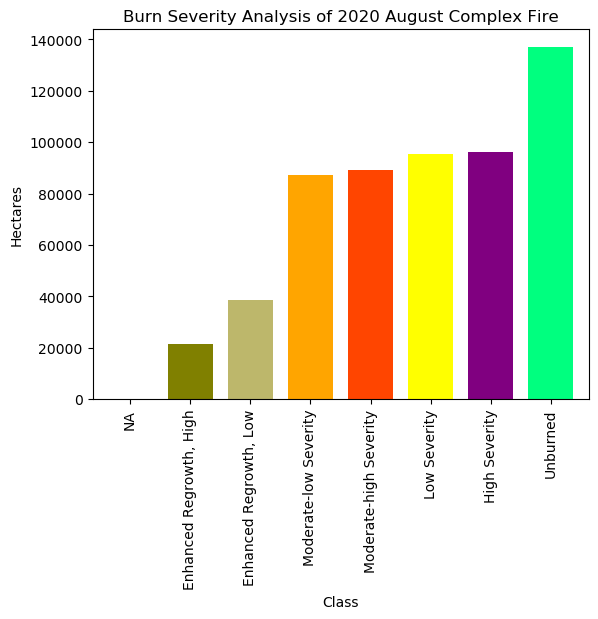

In [45]:
df_stats['Hectares'].sort_values().plot.bar(color = ['gold', 'olive', 'darkkhaki'  , 'orange', 'orangered', 'yellow','purple', 'springgreen' ], width = 0.75)
plt.ylabel('Hectares')
plt.title('Burn Severity Analysis of 2020 August Complex Fire')


Text(0.5, 1.0, 'Burn Severity Analysis of 2020 August Complex Fire')

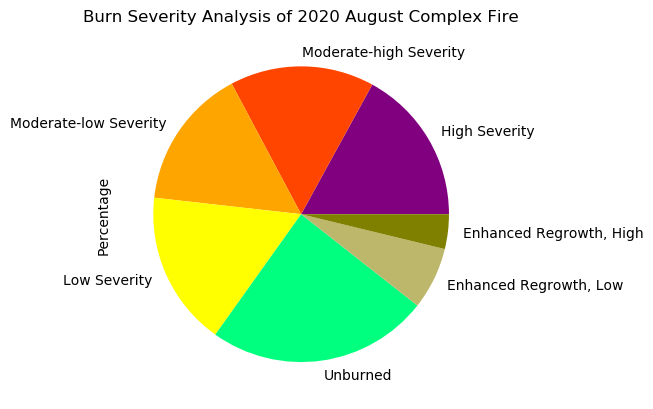

In [46]:
# Pie Chart of Percentage by Class
df_stats.plot(kind = 'pie', y = 'Percentage',
              colors = ['floralwhite', 'purple', 'orangered'  , 'orange', 'yellow', 'springgreen','darkkhaki', 'olive' ],
             legend= False)
plt.title('Burn Severity Analysis of 2020 August Complex Fire')

<a id='Future_Analyses'></a>
### Future Analyses

With more time, the data extracted could be analyzed with other characteristics of the environment, such as slope, aspect, wind direction, and humidity. These analyses would better inform wildfire researchers the nature of fires, how they spread, and what characteristics increase severity.

Additionally, this burn severity map can be compared to other wildfire burn severity maps as a function of time to see if the severity of the burns is getting worse. This would help inform wildfire researchers determine how quickly fires are increasingly negatively affecting the environment. Burn severity can also be compared temporally so that wildfire prevention can be implemented to the parts of the state most at risk. 

<a id='references'></a> 
### References

- Sentinel data GEE page: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2 
- USFS MTBS Shapefile GEE page: https://developers.google.com/earth-engine/datasets/catalog/USFS_GTAC_MTBS_burned_area_boundaries_v1#description 
- MTBS Project Page: https://www.mtbs.gov/ 
- Step by Step: Burn Severity mapping in Google Earth Engine https://code.earthengine.google.com/b455ba8cf4b5bee822bb7ff8935e6209